In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'
import seaborn as sns
import warnings

# 마이너스 부호 깨짐 현상 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_excel('./영주날씨&사과데이터_fin.xlsx')
df

,일별,5달전평균기온,3달전평균기온,10일전평균기온,5달전최고기온,3달전최고기온,10일전최고기온,5달전최저기온,3달전최저기온,10일전최저기온,...,상,보통,등외,조생종,중생종,만생종,평균가격(원),총거래물량(kg),환산,총거래금액(원)
0,2020-01-02,12.753642,6.514444,-0.33,18.517881,12.465556,4.51,7.864238,1.251111,-4.82,...,0.0,0.0,0.0,0.0,0,1.0,23825.000000,1200.0,2515920.0,2859000
1,2020-01-03,12.578808,6.313333,-0.40,18.314570,12.225556,4.37,7.696026,1.067778,-4.91,...,5.0,0.0,1.0,0.0,0,25.0,20758.489360,69636.0,139956432.0,159041400
2,2020-01-04,12.401987,6.123333,-0.23,18.109934,12.011111,4.18,7.540397,0.910000,-4.37,...,8.0,4.0,12.0,0.0,0,33.0,29777.616742,81055.0,123458808.0,140294100
3,2020-01-05,12.241060,5.984444,-0.12,17.934437,11.864444,3.81,7.382119,0.761111,-4.07,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.0,0
4,2020-01-06,12.069536,5.828889,-0.34,17.776821,11.763333,4.10,7.188742,0.560000,-4.72,...,9.0,4.0,13.0,0.0,0,53.0,28609.448045,202560.0,404217792.0,459338400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2023-12-27,14.821192,8.071111,-5.09,20.274172,13.655556,-1.10,10.123179,2.828889,-9.20,...,5.0,3.0,10.0,0.0,0,23.0,81514.261854,67630.0,253676378.2,255980200
1456,2023-12-28,14.643709,7.842222,-4.11,20.097351,13.448889,0.27,9.947682,2.602222,-8.46,...,6.0,3.0,13.0,0.0,0,26.0,86518.829996,66330.0,255410231.8,257729800
1457,2023-12-29,14.461589,7.638889,-3.34,19.910596,13.252222,1.08,9.757616,2.373333,-7.79,...,8.0,3.0,15.0,0.0,0,35.0,80993.183827,56365.0,248579467.0,250837000
1458,2023-12-30,14.277483,7.433333,-3.07,19.730464,13.058889,1.41,9.571523,2.165556,-7.45,...,4.0,1.0,2.0,0.0,0,9.0,63207.842434,10400.0,40636648.7,41005700


In [4]:
# 타켓 : 총거래물량(kg) 0원인 행  제거
df = df[df['총거래물량(kg)'] != 0]

# 날짜 열을 인덱스로 설정
df.set_index('일별', inplace=True)

df.head()

,5달전평균기온,3달전평균기온,10일전평균기온,5달전최고기온,3달전최고기온,10일전최고기온,5달전최저기온,3달전최저기온,10일전최저기온,5달전평균일교차,...,상,보통,등외,조생종,중생종,만생종,평균가격(원),총거래물량(kg),환산,총거래금액(원)
일별,,,,,,,,,,,,,,,,,,,,,
2020-01-02,12.753642,6.514444,-0.33,18.517881,12.465556,4.51,7.864238,1.251111,-4.82,10.653642,...,0.0,0.0,0.0,0.0,0,1.0,23825.000000,1200.0,2515920.0,2859000
2020-01-03,12.578808,6.313333,-0.40,18.314570,12.225556,4.37,7.696026,1.067778,-4.91,10.618543,...,5.0,0.0,1.0,0.0,0,25.0,20758.489360,69636.0,139956432.0,159041400
2020-01-04,12.401987,6.123333,-0.23,18.109934,12.011111,4.18,7.540397,0.910000,-4.37,10.569536,...,8.0,4.0,12.0,0.0,0,33.0,29777.616742,81055.0,123458808.0,140294100
2020-01-06,12.069536,5.828889,-0.34,17.776821,11.763333,4.10,7.188742,0.560000,-4.72,10.588079,...,9.0,4.0,13.0,0.0,0,53.0,28609.448045,202560.0,404217792.0,459338400
2020-01-07,11.909934,5.675556,-0.09,17.586755,11.582222,4.36,7.025828,0.450000,-4.54,10.560927,...,6.0,3.0,9.0,0.0,0,37.0,28631.750371,144105.0,272658848.0,309839600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1216 entries, 2020-01-02 to 2023-12-30
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5달전평균기온     1216 non-null   float64
 1   3달전평균기온     1216 non-null   float64
 2   10일전평균기온    1216 non-null   float64
 3   5달전최고기온     1216 non-null   float64
 4   3달전최고기온     1216 non-null   float64
 5   10일전최고기온    1216 non-null   float64
 6   5달전최저기온     1216 non-null   float64
 7   3달전최저기온     1216 non-null   float64
 8   10일전최저기온    1216 non-null   float64
 9   5달전평균일교차    1216 non-null   float64
 10  3달전평균일교차    1216 non-null   float64
 11  10일전평균일교차   1216 non-null   float64
 12  5달전평균습도     1216 non-null   float64
 13  3달전평균습도     1216 non-null   float64
 14  10일전평균습도    1216 non-null   float64
 15  5달전평균강우량    1216 non-null   float64
 16  3달전평균강우량    1216 non-null   float64
 17  10일전평균강우량   1216 non-null   float64
 18  5달전평균일사량    1216 non-null   float64
 19  3달전평균일사량 

In [6]:
df['중생종'] = df['중생종'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1216 entries, 2020-01-02 to 2023-12-30
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5달전평균기온     1216 non-null   float64
 1   3달전평균기온     1216 non-null   float64
 2   10일전평균기온    1216 non-null   float64
 3   5달전최고기온     1216 non-null   float64
 4   3달전최고기온     1216 non-null   float64
 5   10일전최고기온    1216 non-null   float64
 6   5달전최저기온     1216 non-null   float64
 7   3달전최저기온     1216 non-null   float64
 8   10일전최저기온    1216 non-null   float64
 9   5달전평균일교차    1216 non-null   float64
 10  3달전평균일교차    1216 non-null   float64
 11  10일전평균일교차   1216 non-null   float64
 12  5달전평균습도     1216 non-null   float64
 13  3달전평균습도     1216 non-null   float64
 14  10일전평균습도    1216 non-null   float64
 15  5달전평균강우량    1216 non-null   float64
 16  3달전평균강우량    1216 non-null   float64
 17  10일전평균강우량   1216 non-null   float64
 18  5달전평균일사량    1216 non-null   float64
 19  3달전평균일사량 

In [7]:
# 타겟 : 총거래물량(kg)

# 속성 :
# 5달전평균기온	3달전평균기온	10일전평균기온	
# 5달전최고기온	3달전최고기온	10일전최고기온	
# 5달전최저기온	3달전최저기온	10일전최저기온	
# 5달전평균일교차	3달전평균일교차	10일전평균일교차	
# 5달전평균습도	3달전평균습도	10일전평균습도	
# 5달전평균강우량	3달전평균강우량	10일전평균강우량	
# 5달전평균일사량	3달전평균일사량	10일전평균일사량	
# 5달전평균결로시간	3달전평균결로시간	10일전평균결로시간	
# 특	상	보통	등외	조생종	중생종	만생종	
# 평균가격(원)	환산(물가지수반영)	총거래금액(원)

# 히트맵을 통해 타겟과 상관관계 0.3이상인 속성들만 남겨두고 제거 후
# 속성들 간 다중공선성 고려하여 0.9이상인 것들 중 타겟과 연관성 높은 것만 남기고 제거

---- 밑에 히트맵은 내가 기존에 직접 선택한 피쳐들로 그린 것---

- 밑에 가설검정 및 상관관계를 통해 최종선택한 변수와 비교해볼것

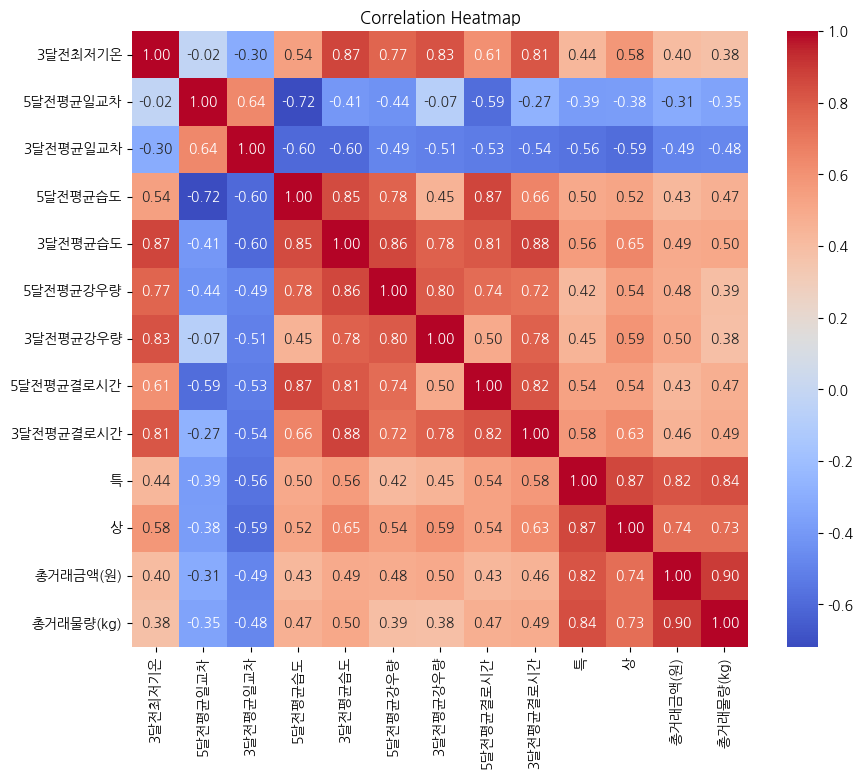

In [39]:
# correlation_matrix = data.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
# plt.title('Correlation Heatmap')
# plt.show()


---

In [13]:
from scipy import stats
# 데이터 프레임에서 컬럼들 간의 가설을 검정

#  Pearson 상관계수의 유의성 검정을 할 수 있습니다.
# SciPy의 stats.pearsonr 함수를 사용하여 이를 수행

In [14]:
features=[ '5달전평균기온', '3달전평균기온',	'10일전평균기온',	
'5달전최고기온',	'3달전최고기온',	'10일전최고기온',	
'5달전최저기온',	'3달전최저기온',	'10일전최저기온',	
'5달전평균일교차',	'3달전평균일교차',	'10일전평균일교차'	,
'5달전평균습도',	'3달전평균습도',	'10일전평균습도',	
'5달전평균강우량'	,'3달전평균강우량',	'10일전평균강우량',	
'5달전평균일사량',	'3달전평균일사량'	,'10일전평균일사량'	,
'5달전평균결로시간'	,'3달전평균결로시간',	'10일전평균결로시간',	
'특',	'상',	'보통','등외',	'조생종'	,'중생종',	'만생종',	
'총거래금액(원)']

for feature in features:
    column_name = feature
    target_column = '총거래물량(kg)'

    correlation, p_value = stats.pearsonr(df[column_name], df[target_column])
    print(f"Correlation between {column_name} and {target_column}: {correlation}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("The correlation is statistically significant.")
    else:
        print("The correlation is not statistically significant.")
    print('-'*150)


Correlation between 5달전평균기온 and 총거래물량(kg): 0.45816147115001243
P-value: 3.8584998628963286e-64
The correlation is statistically significant.
------------------------------------------------------------------------------------------------------------------------------------------------------
Correlation between 3달전평균기온 and 총거래물량(kg): 0.3427167286725912
P-value: 7.664939109870424e-35
The correlation is statistically significant.
------------------------------------------------------------------------------------------------------------------------------------------------------
Correlation between 10일전평균기온 and 총거래물량(kg): 0.06482408744562837
P-value: 0.02378736944526017
The correlation is statistically significant.
------------------------------------------------------------------------------------------------------------------------------------------------------
Correlation between 5달전최고기온 and 총거래물량(kg): 0.450936416271275
P-value: 5.9668863483534055e-62
The correlation is statistically si

In [15]:
# 뭔 죄다 연관있대 ㅡㅡ 웃기고있어

In [16]:
# 다중 선형 회귀 분석을 통해 가설을 검정하는 방법

In [17]:
import statsmodels.api as sm

In [18]:
X = df[features]  # 독립 변수
y = df['총거래물량(kg)'] # 종속 변수

In [19]:
X_with_const = sm.add_constant(X)  # 상수항을 추가한 독립 변수

model = sm.OLS(y, X_with_const)  # Ordinary Least Squares 모델 생성
result = model.fit()  # 모델 학습


In [20]:
#  p-value가 일정 수준(예: 0.05)보다 작으면, 
# 해당 독립 변수는 종속 변수에 통계적으로 유의한 영향을 미친다고 볼 수 있음 

In [21]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              총거래물량(kg)   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     347.0
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:24:11   Log-Likelihood:                -13666.
No. Observations:                1216   AIC:                         2.740e+04
Df Residuals:                    1183   BIC:                         2.757e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.303e+05   4.05e+04      3.222      0.0

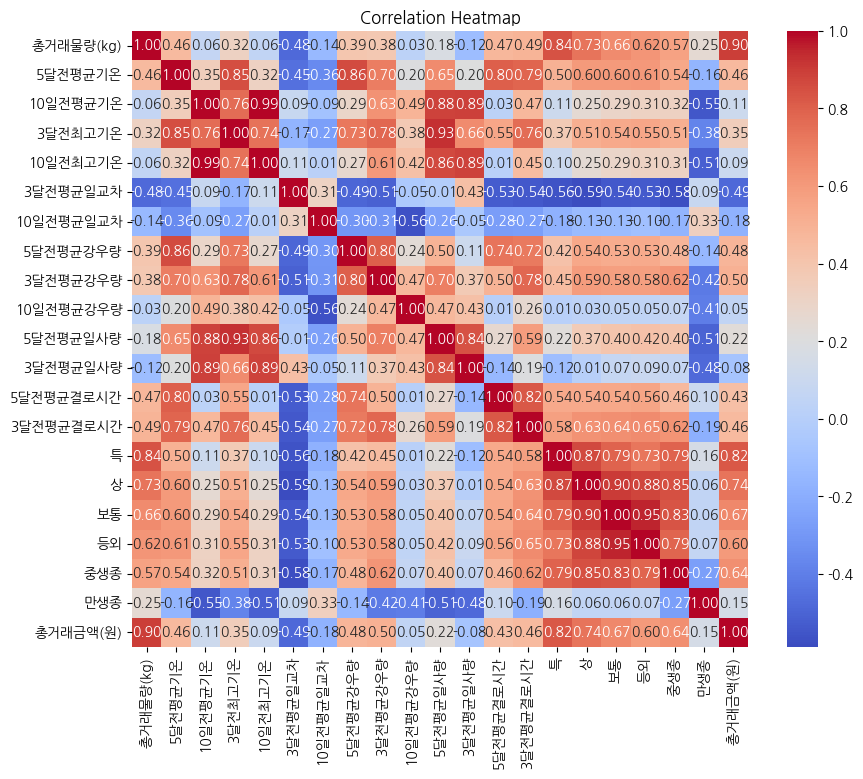

In [22]:
# 위 가설검정을 통해 계수의 유의성 검정 후 p-value 0.05보다 작은 변수들 선택

p_value_features = ['5달전평균기온', '10일전평균기온', '3달전최고기온', '10일전최고기온', '3달전평균일교차',
'10일전평균일교차', '5달전평균강우량', '3달전평균강우량', '10일전평균강우량', '5달전평균일사량',
'3달전평균일사량','5달전평균결로시간', '3달전평균결로시간', '특', '상', '보통','등외',
'중생종', '만생종', '총거래금액(원)']

# 상관관계를 확인하여 다중공선성 검사하기
data = df[['총거래물량(kg)']+p_value_features]
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
# VIF(Variance Inflation Factor)는 다중공선성을 확인하는 지표
# 각 독립 변수의 설명력에 다른 독립 변수들이 얼마나 영향을 미치는지를 나타냄 
# VIF 값이 10 이상이면 다중공선성이 있을 가능성이 높으며, 일반적으로 이러한 변수들을 
# 제거하거나 조정

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수 정의
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# VIF 계산
vif_results = calculate_vif(df[features])

# 결과 출력
print(vif_results)


       feature           VIF
0      5달전평균기온  5.102414e+05
1      3달전평균기온  1.513640e+05
2     10일전평균기온  7.827553e+03
3      5달전최고기온  1.083471e+06
4      3달전최고기온  4.956100e+05
5     10일전최고기온  2.182081e+04
6      5달전최저기온  2.391738e+05
7      3달전최저기온  1.407376e+05
8     10일전최저기온  6.921513e+03
9     5달전평균일교차  2.332463e+05
10    3달전평균일교차  1.182429e+05
11   10일전평균일교차  4.852608e+03
12     5달전평균습도  7.229992e+03
13     3달전평균습도  5.474653e+03
14    10일전평균습도  3.209234e+02
15    5달전평균강우량  5.978189e+01
16    3달전평균강우량  4.914493e+01
17   10일전평균강우량  6.556082e+00
18    5달전평균일사량  4.595742e+03
19    3달전평균일사량  3.032539e+03
20   10일전평균일사량  1.792793e+02
21   5달전평균결로시간  2.591038e+02
22   3달전평균결로시간  1.907900e+02
23  10일전평균결로시간  2.127563e+01
24           특  3.068180e+01
25           상  2.928072e+01
26          보통  4.301190e+01
27          등외  4.124807e+01
28         조생종  2.771556e+00
29         중생종  2.608604e+01
30         만생종  2.579456e+01
31    총거래금액(원)  1.007348e+01


In [ ]:
# vif 지표 검사 결과

# 10이상인 속성은 

# 5달전평균기온  5.102414e+05
# 5달전최고기온  1.083471e+06
# 3달전최고기온  4.956100e+05
# 10일전최고기온  2.182081e+04
# 5달전최저기온  2.391738e+05
# 3달전최저기온  1.407376e+05
# 10일전최저기온  6.921513e+03
# 5달전평균일교차  2.332463e+05
# 3달전평균일교차  1.182429e+05
# 10일전평균일교차  4.852608e+03
# 5달전평균습도  7.229992e+03
# 3달전평균습도  5.474653e+03
# 10일전평균습도  3.209234e+02
# 5달전평균일사량  4.595742e+03
# 3달전평균일사량  3.032539e+03
# 10일전평균일사량  1.792793e+02
# 5달전평균결로시간  2.591038e+02
# 3달전평균결로시간 1.907900e+02


In [117]:
# 위 vif지수를 통해 상관관계 확인 한 결과

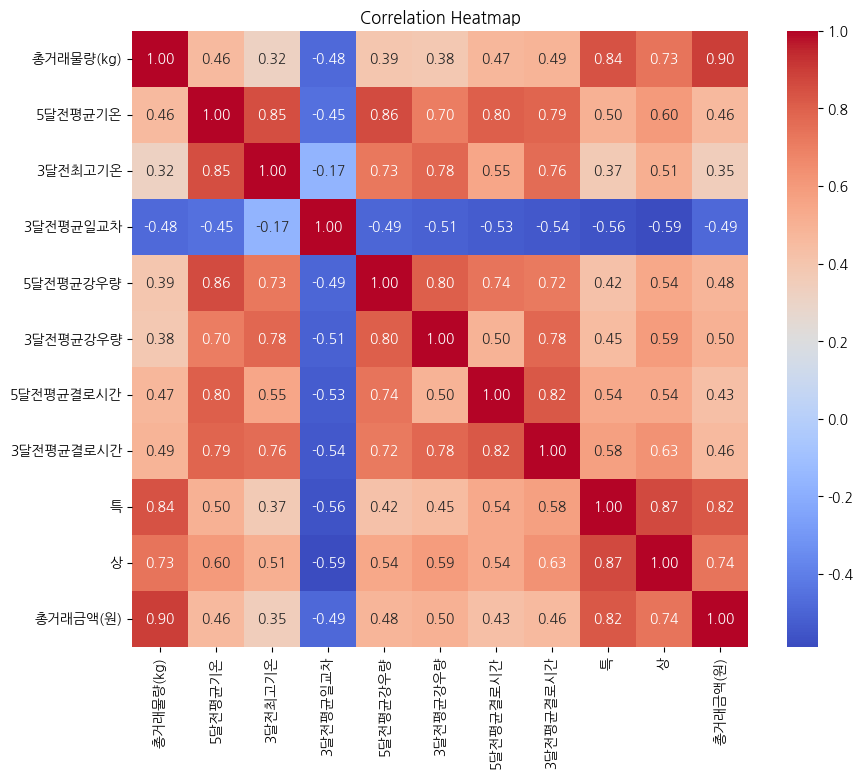

In [25]:
# 최종 속성 선택

fin_features = ['5달전평균기온', '3달전최고기온', '3달전평균일교차',
              '5달전평균강우량', '3달전평균강우량', '5달전평균결로시간', 
              '3달전평균결로시간', '특', '상',  '총거래금액(원)']


correlation_matrix = df[['총거래물량(kg)']+fin_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [26]:
# 최종 전처리를 마친 로우 데이터

fin_df = df[['총거래물량(kg)']+fin_features]

In [27]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1216 entries, 2020-01-02 to 2023-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총거래물량(kg)  1216 non-null   float64
 1   5달전평균기온    1216 non-null   float64
 2   3달전최고기온    1216 non-null   float64
 3   3달전평균일교차   1216 non-null   float64
 4   5달전평균강우량   1216 non-null   float64
 5   3달전평균강우량   1216 non-null   float64
 6   5달전평균결로시간  1216 non-null   float64
 7   3달전평균결로시간  1216 non-null   float64
 8   특          1216 non-null   float64
 9   상          1216 non-null   float64
 10  총거래금액(원)   1216 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 114.0 KB


In [28]:
fin_df.to_excel('./finaldata.xlsx', index=False)